## Regression Predict Student Solution
@ Explore Data Science Academy

Honour Code
We as TEAM CBB5, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code.

Non-compliance with the honour code constitutes a material breach of contract.

##  Predict Overview : Spain Electricity Shortfall Challenge
The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation.

## Table of Contents
1. Importing Packages

2. Loading Data

3. Exploratory Data Analysis (EDA)

4. Data Engineering

5. Modeling

6. Model Performance

7. Model Explanations




## Features in each city

Cloud_all - Percentage cloud coverage

Time - Weather conditions (in date format)

Wind_speed

Wind_deg - The direction of the wind

Snow - Amount of snowfall

Rain - Amount of rain in ( 1 - 3 hours)

Pressure - Atmosphere pressure

## 1. Importing Packages 

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics as metrics

import matplotlib.cm as cm #for rainbow colours
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import pickle
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import plot_tree
from statsmodels.tsa.arima_model import ARIMA
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings('ignore')
%matplotlib inline

## Libaraies Installed

1. Plotly's Python graphing library 
2. xgboost for gradient boosting framework

In [12]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


## 2. Loading the Data

In [13]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 48)

In [14]:
#loading dataframe
train_data = pd.read_csv('df_train.csv', index_col=0)
test_data = pd.read_csv('df_test.csv' , index_col = 0)

copy_test = test_data.copy()

FileNotFoundError: [Errno 2] No such file or directory: 'df_train.csv'

## 3. Exploratory Data Analysis (EDA)

In [ ]:
train_data.shape

(8763, 48)

In [ ]:
train_data.head()

time  Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  \
0  2015-01-01 03:00:00           0.666667           level_5             0.0   
1  2015-01-01 06:00:00           0.333333          level_10             0.0   
2  2015-01-01 09:00:00           1.000000           level_9             0.0   
3  2015-01-01 12:00:00           1.000000           level_8             0.0   
4  2015-01-01 15:00:00           1.000000           level_7             0.0   

   Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
0             0.666667         74.333333        64.000000                0.0   
1             1.666667         78.333333        64.666667                0.0   
2             1.000000         71.333333        64.333333                0.0   
3             1.000000         65.333333        56.333333                0.0   
4             1.000000         59.000000        57.000000                2.0   

   Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
0           1.000000                 0.0       223.333333   
1           1.000000                 0.0       221.000000   
2           1.000000                 0.0       214.333333   
3           1.000000                 0.0       199.666667   
4           0.333333                 0.0       185.000000   

   Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
0              6.333333           42.666667                0.0   
1              4.000000          139.000000                0.0   
2              2.000000          326.000000                0.0   
3              2.333333          273.000000                0.0   
4              4.333333          260.000000                0.0   

   Seville_wind_speed  Barcelona_rain_1h Seville_pressure  Seville_rain_1h  \
0            3.333333                0.0             sp25              0.0   
1            3.333333                0.0             sp25              0.0   
2            2.666667                0.0             sp25              0.0   
3            4.000000                0.0             sp25              0.0   
4            3.000000                0.0             sp25              0.0   

   Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  \
0             0.0         1036.333333              0.0             0.0   
1             0.0         1037.333333              0.0             0.0   
2             0.0         1038.000000              0.0             0.0   
3             0.0         1037.000000              0.0             0.0   
4             0.0         1035.000000              0.0             0.0   

   Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  \
0                0.0               0.0              800.0   
1                0.0               0.0              800.0   
2                0.0               0.0              800.0   
3                0.0               0.0              800.0   
4                0.0               0.0              800.0   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0                 800.0      1035.000000               800.0   
1                 800.0      1035.666667               800.0   
2                 800.0      1036.000000               800.0   
3                 800.0      1036.000000               800.0   
4                 800.0      1035.333333               800.0   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0        1002.666667        274.254667       971.333333         269.888000   
1        1004.333333        274.945000       972.666667         271.728333   
2        1005.333333        278.792000       974.000000         278.008667   
3        1009.000000        285.394000       994.666667         284.899552   
4                NaN        285.513719      1035.333333         283.015115   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0     269.888000              800.0    274.254667          75.666667   
1     271.728333   

In [ ]:
test_data.head()

time  Madrid_wind_speed Valencia_wind_deg  \
8763  2018-01-01 00:00:00           5.000000           level_8   
8764  2018-01-01 03:00:00           4.666667           level_8   
8765  2018-01-01 06:00:00           2.333333           level_7   
8766  2018-01-01 09:00:00           2.666667           level_7   
8767  2018-01-01 12:00:00           4.000000           level_7   

      Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
8763             0.0             5.000000         87.000000        71.333333   
8764             0.0             5.333333         89.000000        78.000000   
8765             0.0             5.000000         89.000000        89.666667   
8766             0.0             5.333333         93.333333        82.666667   
8767             0.0             8.666667         65.333333        64.000000   

      Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  \
8763          20.000000           3.000000            0.000000   
8764           0.000000           3.666667            0.000000   
8765           0.000000           2.333333            6.666667   
8766          26.666667           5.666667            6.666667   
8767          26.666667          10.666667            0.000000   

      Bilbao_wind_deg  Barcelona_wind_speed  Barcelona_wind_deg  \
8763       193.333333              4.000000          176.666667   
8764       143.333333              4.666667          266.666667   
8765       130.000000              4.000000          263.333333   
8766       196.666667              2.333333           86.666667   
8767       233.333333              4.666667          283.333333   

      Madrid_clouds_all  Seville_wind_speed  Barcelona_rain_1h  \
8763                0.0            1.000000                0.0   
8764                0.0            0.666667                0.0   
8765                0.0            0.666667                0.0   
8766                0.0            1.333333                0.0   
8767                0.0            1.000000                0.0   

     Seville_pressure  Seville_rain_1h  Bilbao_snow_3h  Barcelona_pressure  \
8763             sp25              0.0               0         1017.333333   
8764             sp25              0.0               0         1020.333333   
8765             sp25              0.0               0         1023.000000   
8766             sp25              0.0               0         1025.666667   
8767             sp25              0.0               0         1026.000000   

      Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  Valencia_snow_3h  \
8763              0.0             0.0                0.0                 0   
8764              0.0             0.0                0.0                 0   
8765              0.0             0.0                0.0                 0   
8766              0.0             0.0                0.0                 0   
8767              0.0             0.0                0.0                 0   

      Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  \
8763              800.0            800.000000      1025.666667   
8764              800.0            800.333333      1026.666667   
8765              800.0            800.000000      1025.333333   
8766              800.0            800.000000      1025.000000   
8767              800.0            800.333333      1022.333333   

      Seville_weather_id  Valencia_pressure  Seville_temp_max  \
8763          800.000000                NaN        284.483333   
8764          800.000000                NaN        282.483333   
8765          800.333333                NaN        280.816667   
8766          800.333333                NaN        281.150000   
8767          800.000000                NaN        287.150000   

      Madrid_pressure  Valencia_temp_max  Valencia_temp  Bilbao_weather_id  \
8763      1030.000000         287.483333     287.483333         801.000000   
8764      1030.333333         284.150000     284.150000         

In [ ]:
test_data.shape

(2920, 47)

In [ ]:
train_data.describe()

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
count        8763.000000     8763.000000          8763.000000   
mean            2.425729        0.135753             2.586272   
std             1.850371        0.374901             2.411190   
min             0.000000        0.000000             0.000000   
25%             1.000000        0.000000             1.000000   
50%             2.000000        0.000000             1.666667   
75%             3.333333        0.100000             3.666667   
max            13.000000        3.000000            52.000000   

       Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
count       8763.000000      8763.000000        8763.000000   
mean          62.658793        57.414717          43.469132   
std           22.621226        24.335396          32.551044   
min            8.333333         6.333333           0.000000   
25%           44.333333        36.333333          10.000000   
50%           65.666667        58.000000          45.000000   
75%           82.000000        78.666667          75.000000   
max          100.000000       100.000000         100.000000   

       Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
count        8763.000000         8763.000000      8763.000000   
mean            1.850356           13.714748       158.957511   
std             1.695888           24.272482       102.056299   
min             0.000000            0.000000         0.000000   
25%             0.666667            0.000000        73.333333   
50%             1.000000            0.000000       147.000000   
75%             2.666667           20.000000       234.000000   
max            12.666667           97.333333       359.333333   

       Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
count           8763.000000         8763.000000        8763.000000   
mean               2.870497          190.544848          19.473392   
std                1.792197           89.077337          28.053660   
min                0.000000            0.000000           0.000000   
25%                1.666667          118.166667           0.000000   
50%                2.666667          200.000000           0.000000   
75%                4.000000          260.000000          33.333333   
max               12.666667          360.000000         100.000000   

       Seville_wind_speed  Barcelona_rain_1h  Seville_rain_1h  Bilbao_snow_3h  \
count         8763.000000        8763.000000      8763.000000     8763.000000   
mean             2.425045           0.128906         0.039439        0.031912   
std              1.672895           0.634730         0.175857        0.557264   
min              0.000000           0.000000         0.000000        0.000000   
25%              1.000000           0.000000         0.000000        0.000000   
50%              2.000000           0.000000         0.000000        0.000000   
75%              3.333333           0.000000         0.000000        0.000000   
max             11.666667          12.000000         3.000000       21.300000   

       Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  \
count        8.763000e+03      8763.000000     8763.000000        8763.000000   
mean         1.377965e+03         0.000243        0.037818           0.000439   
std          1.407314e+04         0.003660        0.152639           0.003994   
min          6.706667e+02         0.000000        0.000000           0.000000   
25%          1.014000e+03         0.000000        0.000000           0.000000   
50%          1.018000e+03         0.000000        0.000000           0.000000   
75%          1.022000e+03         0.000000        0.000000           0.000000   
max          1.001411e+06         0.093333        3.000000           0.093000   

       Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  \
count       8763.000000        8763.000000           8763.000000   
mean           0.000205         773.5275

In [ ]:
test_data.describe()

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
count        2920.000000     2920.000000          2920.000000   
mean            2.457820        0.067517             3.012785   
std             1.774838        0.153381             1.996340   
min             0.000000        0.000000             0.000000   
25%             1.333333        0.000000             1.666667   
50%             2.000000        0.000000             2.333333   
75%             3.333333        0.000000             4.000000   
max            13.333333        1.600000            14.333333   

       Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
count       2920.000000      2920.000000        2920.000000   
mean          67.123516        62.644463          43.355422   
std           20.611292        24.138393          30.486298   
min           11.666667         8.000000           0.000000   
25%           52.000000        43.000000          13.333333   
50%           70.333333        63.000000          45.000000   
75%           85.000000        84.000000          75.000000   
max          100.000000       100.000000          97.333333   

       Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
count        2920.000000         2920.000000      2920.000000   
mean            2.283562           15.477283       162.643836   
std             1.654787           25.289197        97.749873   
min             0.000000            0.000000         0.000000   
25%             1.000000            0.000000        86.666667   
50%             1.666667            0.000000       140.000000   
75%             3.333333           20.000000       233.333333   
max            10.666667           93.333333       360.000000   

       Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
count           2920.000000         2920.000000        2920.000000   
mean               2.518094          178.979452          24.255822   
std                1.625507           86.976503          29.430257   
min                0.000000            0.000000           0.000000   
25%                1.333333          113.333333           0.000000   
50%                2.000000          176.666667          11.333333   
75%                3.666667          253.333333          40.000000   
max               12.666667          343.333333          92.000000   

       Seville_wind_speed  Barcelona_rain_1h  Seville_rain_1h  Bilbao_snow_3h  \
count         2920.000000        2920.000000      2920.000000          2920.0   
mean             2.657192           0.047397         0.046164             0.0   
std              1.788870           0.162474         0.193432             0.0   
min              0.000000           0.000000         0.000000             0.0   
25%              1.333333           0.000000         0.000000             0.0   
50%              2.333333           0.000000         0.000000             0.0   
75%              3.666667           0.000000         0.000000             0.0   
max             12.666667           2.300000         2.300000             0.0   

       Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  \
count         2920.000000      2920.000000     2920.000000        2920.000000   
mean          1015.317123         0.000001        0.059863           0.000006   
std              7.021445         0.000074        0.193218           0.000217   
min            988.333333         0.000000        0.000000           0.000000   
25%           1012.000000         0.000000        0.000000           0.000000   
50%           1016.000000         0.000000        0.000000           0.000000   
75%           1019.333333         0.000000        0.000000           0.000000   
max           1037.000000         0.004000        3.000000           0.009667   

       Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  \
count            2920.0        2920.000000           2920.000000   
mean                0.0         758.8201

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

##  Statistics Summary of Features

## Measure Skewnewss and Kurtoisis
Kurtoisis is the measure of the outliers present in the data. When kurtoisis > 3 larger number of ouliers. Low kurtoisis means there is less number of outliers.

In [ ]:
train_data.kurt

<bound method NDFrame._add_numeric_operations.<locals>.kurt of                      time  Madrid_wind_speed Valencia_wind_deg  \
0     2015-01-01 03:00:00           0.666667           level_5   
1     2015-01-01 06:00:00           0.333333          level_10   
2     2015-01-01 09:00:00           1.000000           level_9   
3     2015-01-01 12:00:00           1.000000           level_8   
4     2015-01-01 15:00:00           1.000000           level_7   
...                   ...                ...               ...   
8758  2017-12-31 09:00:00           1.000000           level_6   
8759  2017-12-31 12:00:00           5.000000           level_6   
8760  2017-12-31 15:00:00           6.333333           level_9   
8761  2017-12-31 18:00:00           7.333333           level_8   
8762  2017-12-31 21:00:00           4.333333           level_9   

      Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0                0.0             0.666667         74.333333     

In [ ]:
train_data.describe()

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
count        8763.000000     8763.000000          8763.000000   
mean            2.425729        0.135753             2.586272   
std             1.850371        0.374901             2.411190   
min             0.000000        0.000000             0.000000   
25%             1.000000        0.000000             1.000000   
50%             2.000000        0.000000             1.666667   
75%             3.333333        0.100000             3.666667   
max            13.000000        3.000000            52.000000   

       Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
count       8763.000000      8763.000000        8763.000000   
mean          62.658793        57.414717          43.469132   
std           22.621226        24.335396          32.551044   
min            8.333333         6.333333           0.000000   
25%           44.333333        36.333333          10.000000   
50%           65.666667        58.000000          45.000000   
75%           82.000000        78.666667          75.000000   
max          100.000000       100.000000         100.000000   

       Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
count        8763.000000         8763.000000      8763.000000   
mean            1.850356           13.714748       158.957511   
std             1.695888           24.272482       102.056299   
min             0.000000            0.000000         0.000000   
25%             0.666667            0.000000        73.333333   
50%             1.000000            0.000000       147.000000   
75%             2.666667           20.000000       234.000000   
max            12.666667           97.333333       359.333333   

       Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
count           8763.000000         8763.000000        8763.000000   
mean               2.870497          190.544848          19.473392   
std                1.792197           89.077337          28.053660   
min                0.000000            0.000000           0.000000   
25%                1.666667          118.166667           0.000000   
50%                2.666667          200.000000           0.000000   
75%                4.000000          260.000000          33.333333   
max               12.666667          360.000000         100.000000   

       Seville_wind_speed  Barcelona_rain_1h  Seville_rain_1h  Bilbao_snow_3h  \
count         8763.000000        8763.000000      8763.000000     8763.000000   
mean             2.425045           0.128906         0.039439        0.031912   
std              1.672895           0.634730         0.175857        0.557264   
min              0.000000           0.000000         0.000000        0.000000   
25%              1.000000           0.000000         0.000000        0.000000   
50%              2.000000           0.000000         0.000000        0.000000   
75%              3.333333           0.000000         0.000000        0.000000   
max             11.666667          12.000000         3.000000       21.300000   

       Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  \
count        8.763000e+03      8763.000000     8763.000000        8763.000000   
mean         1.377965e+03         0.000243        0.037818           0.000439   
std          1.407314e+04         0.003660        0.152639           0.003994   
min          6.706667e+02         0.000000        0.000000           0.000000   
25%          1.014000e+03         0.000000        0.000000           0.000000   
50%          1.018000e+03         0.000000        0.000000           0.000000   
75%          1.022000e+03         0.000000        0.000000           0.000000   
max          1.001411e+06         0.093333        3.000000           0.093000   

       Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  \
count       8763.000000        8763.000000           8763.000000   
mean           0.000205         773.5275

In [ ]:
# Checking for outliers in the dataset
train_data.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of                      time  Madrid_wind_speed Valencia_wind_deg  \
0     2015-01-01 03:00:00           0.666667           level_5   
1     2015-01-01 06:00:00           0.333333          level_10   
2     2015-01-01 09:00:00           1.000000           level_9   
3     2015-01-01 12:00:00           1.000000           level_8   
4     2015-01-01 15:00:00           1.000000           level_7   
...                   ...                ...               ...   
8758  2017-12-31 09:00:00           1.000000           level_6   
8759  2017-12-31 12:00:00           5.000000           level_6   
8760  2017-12-31 15:00:00           6.333333           level_9   
8761  2017-12-31 18:00:00           7.333333           level_8   
8762  2017-12-31 21:00:00           4.333333           level_9   

      Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0                0.0             0.666667         74.333333     

## 4. Data Engineering

## Checking for null values

<AxesSubplot:>

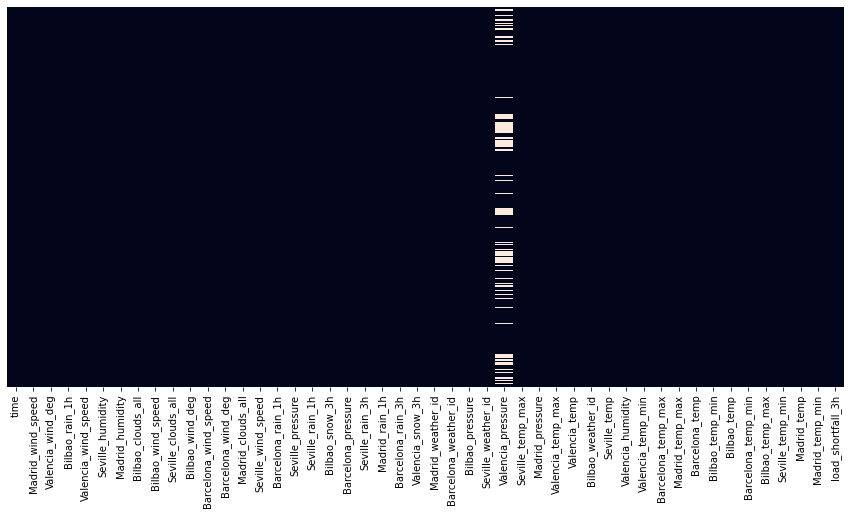

In [ ]:
# Showing the number of missing values in each column
plt.figure(figsize=(15,7))
sns.heatmap(train_data.isna() , yticklabels=False , cbar=False)

By calculating the percentage, we will be able to decide weather we should delete or fill in the missing values

In [ ]:
missing_values_train = train_data.Valencia_pressure.isna().sum()
print(f'Train data Missing Values: {missing_values_train}  |   Percentage: {round(( missing_values_train/ train_data.Valencia_pressure.shape[0]) *100, 2)}%')

Train data Missing Values: 2068  |   Percentage: 23.6%


## Checking for outliers in the column with missing values

<AxesSubplot:xlabel='Valencia_pressure'>

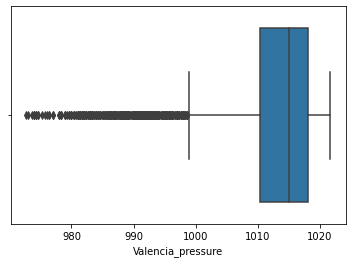

In [ ]:
sns.boxplot(train_data.Valencia_pressure)

In [ ]:
print('Mean:', train_data.Valencia_pressure.mean())
print('Median:',train_data.Valencia_pressure.median())
print('Mode: ',train_data.Valencia_pressure.mode())

Mean: 1012.0514065222828
Median: 1015.0
Mode:  0    1018.0
dtype: float64


## Filling in the missing values

In [ ]:
train_data.Valencia_pressure.fillna(train_data.Valencia_pressure.mode()[0], inplace=True)

In [15]:
test_data.Valencia_pressure.fillna(train_data.Valencia_pressure.mode()[0], inplace=True)

NameError: name 'test_data' is not defined

## Categorical Data Analysis

In [16]:
train_data.dtypes.value_counts()

NameError: name 'train_data' is not defined

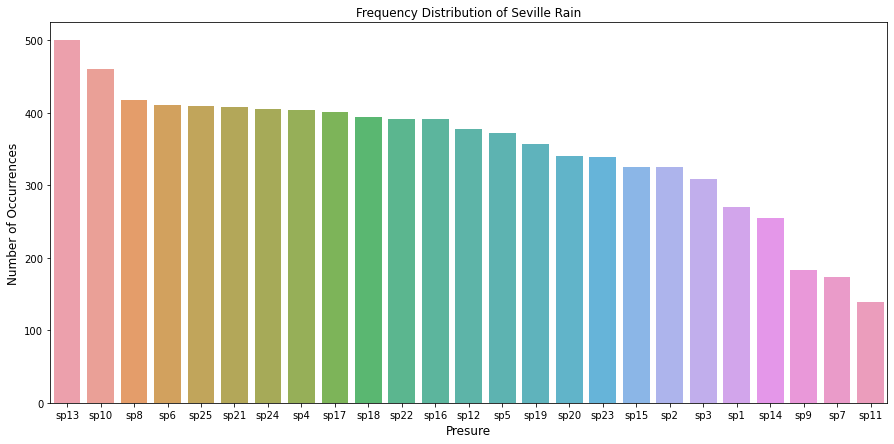

In [ ]:
seville_presure_count = train_data['Seville_pressure'].value_counts()
plt.figure(figsize=(15,7))
sns.barplot(seville_presure_count.index, seville_presure_count.values, alpha=0.9)
plt.title('Frequency Distribution of Seville Rain')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Presure', fontsize=12)
plt.show()

In [17]:
valencia_wind_count = train_data['Valencia_wind_deg'].value_counts()
plt.figure(figsize=(12,7))
sns.barplot(valencia_wind_count.index, valencia_wind_count.values, alpha=0.9)
plt.title('Frequency Distribution of Valencia Wind Deg')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Levels', fontsize=12)
plt.show()

NameError: name 'train_data' is not defined

## Encoding

In [ ]:
enc = OrdinalEncoder()

train_data.Valencia_wind_deg = enc.fit_transform(train_data[['Valencia_wind_deg']])
train_data.Seville_pressure = enc.fit_transform(train_data[['Seville_pressure']])

In [ ]:
test_data.Valencia_wind_deg = enc.fit_transform(test_data[['Valencia_wind_deg']])
test_data.Seville_pressure = enc.fit_transform(test_data[['Seville_pressure']])

In [ ]:
train_data['Valencia_wind_deg']

0       5.0
1       1.0
2       9.0
3       8.0
4       7.0
       ... 
8758    6.0
8759    6.0
8760    9.0
8761    8.0
8762    9.0
Name: Valencia_wind_deg, Length: 8763, dtype: float64

## Splitting the time feature

In [ ]:
# Spliting time - by conversion from an object to dateformat
train_data['Hour_of_day'] = train_data['time'].astype('datetime64').dt.hour
train_data['Year'] = train_data['time'].astype('datetime64').dt.year
train_data['Hour_of_week'] = train_data['time'].astype('datetime64').dt.hour
train_data['Day_of_month'] = train_data['time'].astype('datetime64').dt.day
train_data['Day_of_week'] = train_data['time'].astype('datetime64').dt.day
train_data['Month'] = train_data['time'].astype('datetime64').dt.month

In [ ]:
test_data['Hour_of_day'] = test_data['time'].astype('datetime64').dt.hour
test_data['Year'] = test_data['time'].astype('datetime64').dt.year
test_data['Hour_of_week'] = test_data['time'].astype('datetime64').dt.hour
test_data['Day_of_month'] = test_data['time'].astype('datetime64').dt.day
test_data['Day_of_week'] = test_data['time'].astype('datetime64').dt.day
test_data['Month'] = test_data['time'].astype('datetime64').dt.month


##  Load Shortfall Analysis

Analysing the load shortfall feature to gain more insight since it is the target variable.

In [ ]:
train_data['load_shortfall_3h']

0       6715.666667
1       4171.666667
2       4274.666667
3       5075.666667
4       6620.666667
           ...     
8758     -28.333333
8759    2266.666667
8760     822.000000
8761    -760.000000
8762    2780.666667
Name: load_shortfall_3h, Length: 8763, dtype: float64

## Descriptive Statistics

In [ ]:
train_data['load_shortfall_3h'].describe()

count     8763.000000
mean     10673.857612
std       5218.046404
min      -6618.000000
25%       7390.333333
50%      11114.666667
75%      14498.166667
max      31904.000000
Name: load_shortfall_3h, dtype: float64

In [ ]:

#when the loadshorfall is at max/min, which time of the year is this? - how is the temp on that time of the year
#when the loadshorfall is at average, which time of the year is this? - how is the temp on that time of the year
# which city can experience max/min temp , rain ,snow

#1. Measure Windspeed , rain , humadity , pressure,snow in time from 2015-2018
#2. Measure Maximum Temp and Minimum Temp in time
#3. Benchmark Loadshortfall with the above features (If loadshortfall is below/above a particular threshold how is the temparature(low/high))

Choose to use the Madrid ciy for analysis of climate factors because we found that by research it has the highest population rate

In [ ]:
import plotly.graph_objects as go
fig = px.scatter(train_data.groupby(train_data['load_shortfall_3h'])['Madrid_temp'].mean(),
             title = 'Madrid Humidity Vs Load shortfall',
           y='Madrid_temp',width =1000, height=500,trendline="ols", trendline_color_override="yellow")
         
#.update_traces(line_color='#e377c2')
fig

NameError: name 'train_data' is not defined

In [ ]:
fig = px.line(train_data.groupby(train_data['Hour_of_day'])['load_shortfall_3h'].mean(),
        title = 'Load_shortfall_3h by Year',
        y='load_shortfall_3h',width =1000, height=500 )
fig.update_traces(line_color= '#17becf')
fig

In [ ]:
fig = px.line(train_data.groupby(train_data['Month'])['Madrid_humidity'].mean(),
             title = 'Madrid Humidity by Month',
           y='Madrid_humidity',width =1000, height=500 )
fig.update_traces(line_color='#e377c2')
fig

In [ ]:
fig = px.line(train_data.groupby(train_data['Year'])['load_shortfall_3h'].mean(),
        title = 'Load_shortfall_3h by Year',
        y='load_shortfall_3h',width =1000, height=500 )
fig.update_traces(line_color= '#17becf')
fig

In [ ]:
fig = px.line(train_data.groupby(train_data['Month'])['load_shortfall_3h'].mean(),
        title = 'Load_shortfall_3h by Month',
        y='load_shortfall_3h',width =1000, height=500 )
fig.update_traces(line_color= '#8c564b')
fig

The graph above illustrates an increase of the load shortfall in the months from May to July then a decrease until August

In [ ]:
fig = px.line(train_data.groupby(train_data['Hour_of_week'])['load_shortfall_3h'].mean(),
        title = 'Load_shortfall_3h Hour in a week',
        y='load_shortfall_3h',width =1000, height=500)
fig.update_traces(line_color= '#17becf')
fig

<AxesSubplot:xlabel='Bilbao_temp'>

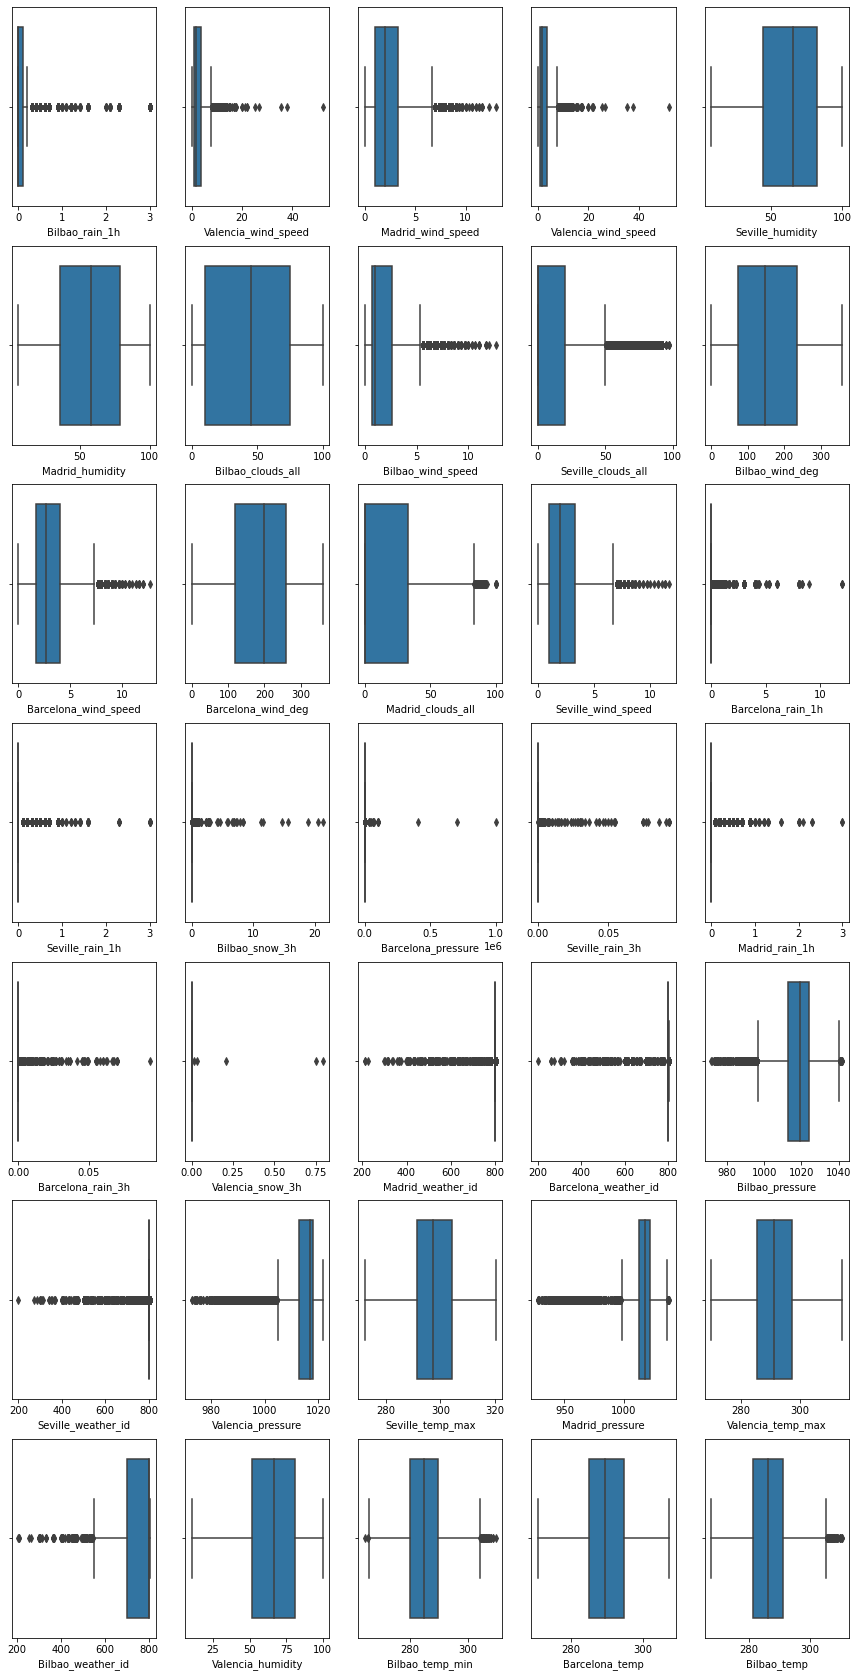

In [ ]:
fig, axes = plt.subplots(7, 5, figsize=(15, 30))
  
sns.boxplot(ax=axes[0, 0], data=train_data, x='Bilbao_rain_1h')
sns.boxplot(ax=axes[0, 1], data=train_data, x='Valencia_wind_speed')
sns.boxplot(ax=axes[0, 2], data=train_data, x='Madrid_wind_speed')
sns.boxplot(ax=axes[0, 3], data=train_data, x='Valencia_wind_speed')
sns.boxplot(ax=axes[0, 4], data=train_data, x='Seville_humidity')
sns.boxplot(ax=axes[1, 0], data=train_data, x='Madrid_humidity')
sns.boxplot(ax=axes[1, 1], data=train_data, x='Bilbao_clouds_all')
sns.boxplot(ax=axes[1, 2], data=train_data, x='Bilbao_wind_speed')
sns.boxplot(ax=axes[1, 3], data=train_data, x='Seville_clouds_all')
sns.boxplot(ax=axes[1, 4], data=train_data, x='Bilbao_wind_deg')
sns.boxplot(ax=axes[2, 0], data=train_data, x='Barcelona_wind_speed')
sns.boxplot(ax=axes[2, 1], data=train_data, x='Barcelona_wind_deg')
sns.boxplot(ax=axes[2, 2], data=train_data, x='Madrid_clouds_all')
sns.boxplot(ax=axes[2, 3], data=train_data, x='Seville_wind_speed')
sns.boxplot(ax=axes[2, 4], data=train_data, x='Barcelona_rain_1h')
sns.boxplot(ax=axes[3, 0], data=train_data, x='Seville_rain_1h')
sns.boxplot(ax=axes[3, 1], data=train_data, x='Bilbao_snow_3h')
sns.boxplot(ax=axes[3, 2], data=train_data, x='Barcelona_pressure')
sns.boxplot(ax=axes[3, 3], data=train_data, x='Seville_rain_3h')
sns.boxplot(ax=axes[3, 4], data=train_data, x='Madrid_rain_1h')
sns.boxplot(ax=axes[4, 0], data=train_data, x='Barcelona_rain_3h')
sns.boxplot(ax=axes[4, 1], data=train_data, x='Valencia_snow_3h')
sns.boxplot(ax=axes[4, 2], data=train_data, x='Madrid_weather_id')
sns.boxplot(ax=axes[4, 3], data=train_data, x='Barcelona_weather_id')
sns.boxplot(ax=axes[4, 4], data=train_data, x='Bilbao_pressure')
sns.boxplot(ax=axes[5, 0], data=train_data, x='Seville_weather_id')
sns.boxplot(ax=axes[5, 1], data=train_data, x='Valencia_pressure')
sns.boxplot(ax=axes[5, 2], data=train_data, x='Seville_temp_max')
sns.boxplot(ax=axes[5, 3], data=train_data, x='Madrid_pressure')
sns.boxplot(ax=axes[5, 4], data=train_data, x='Valencia_temp_max')
sns.boxplot(ax=axes[6, 0], data=train_data, x='Bilbao_weather_id')
sns.boxplot(ax=axes[6, 1], data=train_data, x='Valencia_humidity')
sns.boxplot(ax=axes[6, 2], data=train_data, x='Bilbao_temp_min')
sns.boxplot(ax=axes[6, 3], data=train_data, x='Barcelona_temp')
sns.boxplot(ax=axes[6, 4], data=train_data, x='Bilbao_temp')

## Removing Columns with a lot of outliers

## Correlation Analysis

Heatmap will assist to showcase the linear relationship between features by checking their correlation.

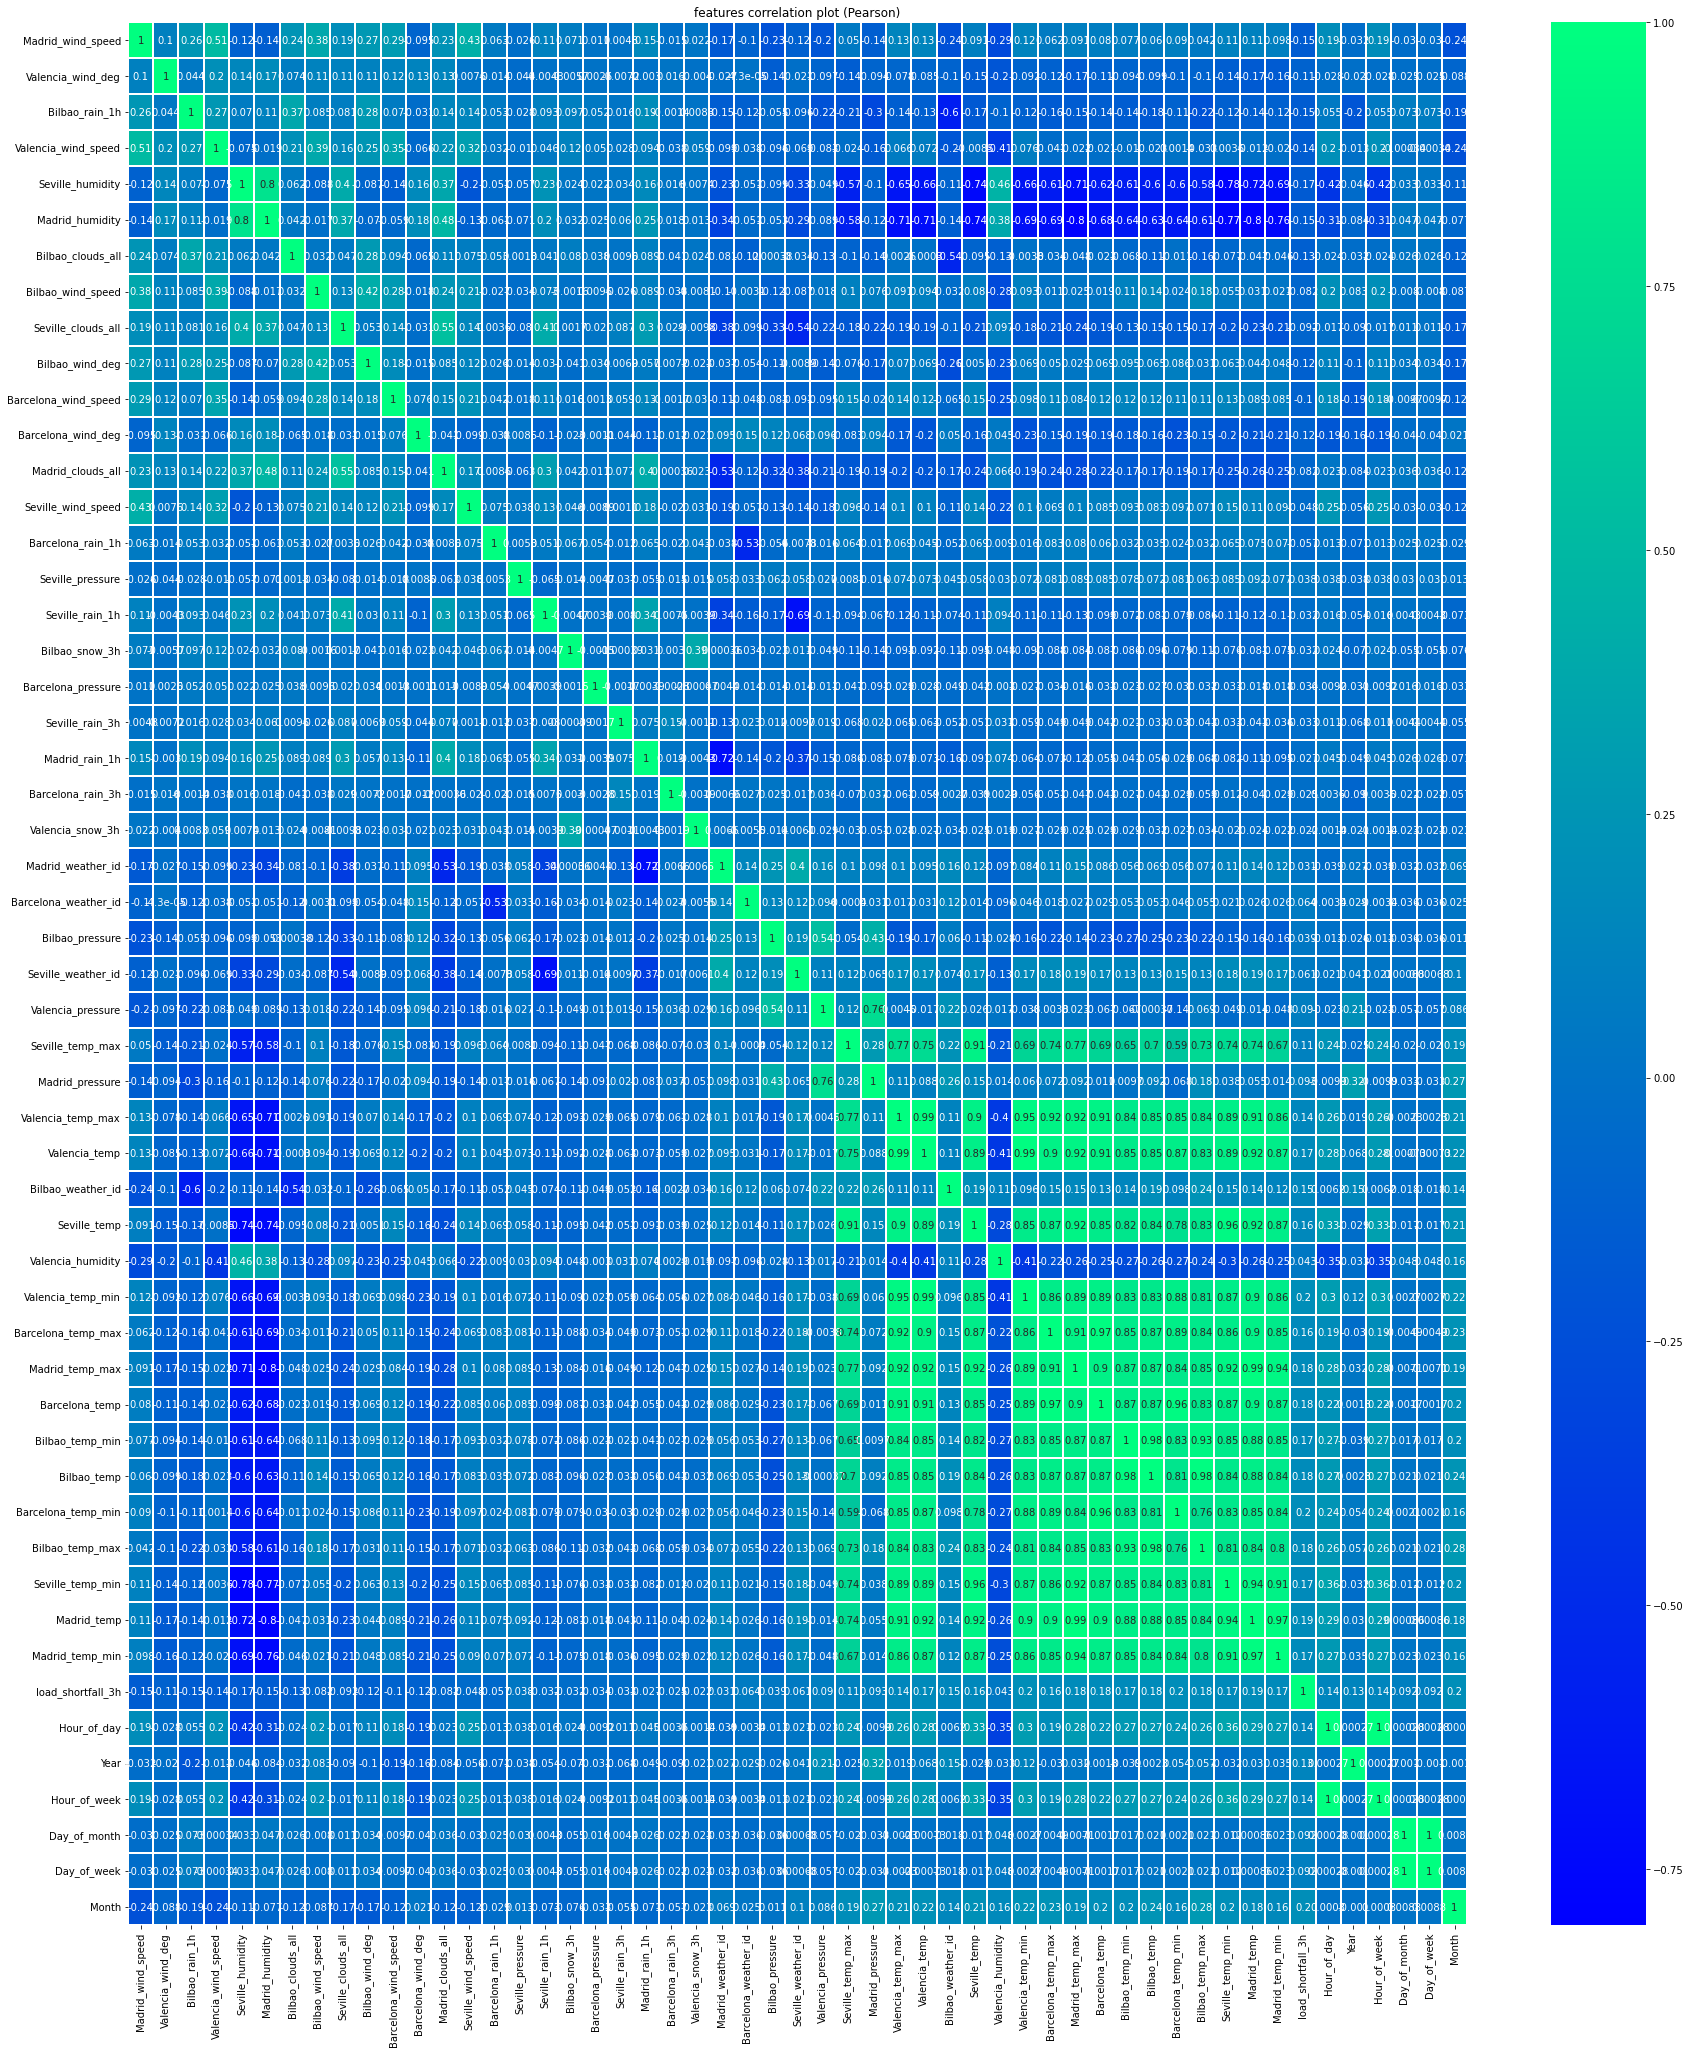

In [ ]:
# evaluate correlation
plt.figure(figsize = (30,35))
plt.title('features correlation plot (Pearson)')
corr = train_data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot = True,linewidths=.1,cmap="winter")
plt.show()

Multicollinearity is a situation where two or more predictors are highly linearly related. The features will therefore need to be dropped to avoid redundancy which is when two predictors might be providing the same information about the response variable thereby leading to unreliable coefficients of the predictors. Which may then lead to overfitting because there are no unique predictor variables to impact the target variable.


In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(data, thresh):
    corr_columns = set()  # Set of all the names of correlated columns
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > thresh: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                corr_columns.add(colname)
    return corr_columns

features = correlation(train_data, 0.8)
features

{'Barcelona_temp',
 'Barcelona_temp_max',
 'Barcelona_temp_min',
 'Bilbao_temp',
 'Bilbao_temp_max',
 'Bilbao_temp_min',
 'Day_of_week',
 'Hour_of_week',
 'Madrid_temp',
 'Madrid_temp_max',
 'Madrid_temp_min',
 'Seville_temp',
 'Seville_temp_min',
 'Valencia_temp',
 'Valencia_temp_min'}

In [ ]:
remove = ['Bilbao_rain _1h',
'Valencia_wind_speed',
'Barcelona_rain_1h',
'Seville_rain_1h',
'Bilbao_snow_3h',
'Barcelona_pressure',
'Seville_rain_3h',
'Madrid_rain_1h',
'Barcelona_rain_3h',
'Valencia_snow_3h',
 'Valencia_weather_id',
        'Barcelona_weather_id',
          'Seville_weather_id',
          'Bilbao_weather_id',
          'Madrid_weather_id',
'Madrid_pressure']  
train_data = train_data[train_data.columns.difference(remove)] 
train_data.head()

Barcelona_temp  Barcelona_temp_max  Barcelona_temp_min  Barcelona_wind_deg  \
0      281.013000          281.013000          281.013000           42.666667   
1      280.561667          280.561667          280.561667          139.000000   
2      281.583667          281.583667          281.583667          326.000000   
3      283.434104          283.434104          283.434104          273.000000   
4      284.213167          284.213167          284.213167          260.000000   

   Barcelona_wind_speed  Bilbao_clouds_all  Bilbao_pressure  Bilbao_rain_1h  \
0              6.333333                0.0      1035.000000             0.0   
1              4.000000                0.0      1035.666667             0.0   
2              2.000000                0.0      1036.000000             0.0   
3              2.333333                0.0      1036.000000             0.0   
4              4.333333                2.0      1035.333333             0.0   

   Bilbao_temp  Bilbao_temp_max  Bilbao_temp_min  Bilbao_wind_deg  \
0   269.338615       269.338615       269.338615       223.333333   
1   270.376000       270.376000       270.376000       221.000000   
2   275.027229       275.027229       275.027229       214.333333   
3   281.135063       281.135063       281.135063       199.666667   
4   282.252063       282.252063       282.252063       185.000000   

   Bilbao_wind_speed  Day_of_month  Day_of_week  Hour_of_day  Hour_of_week  \
0           1.000000             1            1            3             3   
1           1.000000             1            1            6             6   
2           1.000000             1            1            9             9   
3           1.000000             1            1           12            12   
4           0.333333             1            1           15            15   

   Madrid_clouds_all  Madrid_humidity  Madrid_temp  Madrid_temp_max  \
0                0.0        64.000000   265.938000       265.938000   
1                0.0        64.666667   266.386667       266.386667   
2                0.0        64.333333   272.708667       272.708667   
3                0.0        56.333333   281.895219       281.895219   
4                0.0        57.000000   280.678437       280.678437   

   Madrid_temp_min  Madrid_wind_speed  Month  Seville_clouds_all  \
0       265.938000           0.666667      1                 0.0   
1       266.386667           0.333333      1                 0.0   
2       272.708667           1.000000      1                 0.0   
3       281.895219           1.000000      1                 0.0   
4       280.678437           1.000000      1                 0.0   

   Seville_humidity  Seville_pressure  Seville_temp  Seville_temp_max  \
0         74.333333              17.0    274.254667        274.254667   
1         78.333333              17.0    274.945000        274.945000   
2         71.333333              17.0    278.792000        278.792000   
3         65.333333              17.0    285.394000        285.394000   
4         59.000000              17.0    285.513719        285.513719   

   Seville_temp_min  Seville_wind_speed  Valencia_humidity  Valencia_pressure  \
0        274.254667            3.333333          75.666667        1002.666667   
1        274.945000            3.333333          71.000000        1004.333333   
2        278.792000            2.666667          65.666667        1005.333333   
3        285.394000            4.000000          54.000000        1009.000000   
4        285.513719            3.000000          58.333333        1018.000000   

   Valencia_temp  Valencia_temp_max  Valencia_temp_min  Valencia_wind_deg  \
0     269.888000         269.888000         269.888000                5.0   
1     271.728333         271.728333         271.728333                1.0   
2     278.008667         278.008667         278.008667                9.0   
3     284.899552         284.899552         284.899552                8.0   
4     283.

In [ ]:
remove = ['Bilbao_rain _1h',
'Valencia_wind_speed',
'Barcelona_rain_1h',
'Seville_rain_1h',
'Bilbao_snow_3h',
'Barcelona_pressure',
'Seville_rain_3h',
'Madrid_rain_1h',
'Barcelona_rain_3h',
'Valencia_snow_3h',
 'Valencia_weather_id',
        'Barcelona_weather_id',
          'Seville_weather_id',
          'Bilbao_weather_id',
          'Madrid_weather_id',
'Madrid_pressure']  
test_data = test_data[test_data.columns.difference(remove)] 
test_data.head()

Barcelona_temp  Barcelona_temp_max  Barcelona_temp_min  \
8763      287.356667          287.816667          286.816667   
8764      284.190000          284.816667          283.483333   
8765      283.150000          284.483333          281.816667   
8766      283.190000          284.150000          282.150000   
8767      286.816667          287.483333          286.150000   

      Barcelona_wind_deg  Barcelona_wind_speed  Bilbao_clouds_all  \
8763          176.666667              4.000000          20.000000   
8764          266.666667              4.666667           0.000000   
8765          263.333333              4.000000           0.000000   
8766           86.666667              2.333333          26.666667   
8767          283.333333              4.666667          26.666667   

      Bilbao_pressure  Bilbao_rain_1h  Bilbao_temp  Bilbao_temp_max  \
8763      1025.666667             0.0   280.380000       285.150000   
8764      1026.666667             0.0   281.010000       284.150000   
8765      1025.333333             0.0   279.196667       282.150000   
8766      1025.000000             0.0   281.740000       284.483333   
8767      1022.333333             0.0   284.116667       286.816667   

      Bilbao_temp_min  Bilbao_wind_deg  Bilbao_wind_speed  Day_of_month  \
8763       276.150000       193.333333           3.000000             1   
8764       277.816667       143.333333           3.666667             1   
8765       276.816667       130.000000           2.333333             1   
8766       279.150000       196.666667           5.666667             1   
8767       281.816667       233.333333          10.666667             1   

      Day_of_week  Hour_of_day  Hour_of_week  Madrid_clouds_all  \
8763            1            0             0                0.0   
8764            1            3             3                0.0   
8765            1            6             6                0.0   
8766            1            9             9                0.0   
8767            1           12            12                0.0   

      Madrid_humidity  Madrid_temp  Madrid_temp_max  Madrid_temp_min  \
8763        71.333333   279.866667       280.816667       279.150000   
8764        78.000000   279.193333       280.483333       278.150000   
8765        89.666667   276.340000       276.483333       276.150000   
8766        82.666667   275.953333       277.150000       274.483333   
8767        64.000000   280.686667       281.150000       280.150000   

      Madrid_wind_speed  Month  Seville_clouds_all  Seville_humidity  \
8763           5.000000      1            0.000000         87.000000   
8764           4.666667      1            0.000000         89.000000   
8765           2.333333      1            6.666667         89.000000   
8766           2.666667      1            6.666667         93.333333   
8767           4.000000      1            0.000000         65.333333   

      Seville_pressure  Seville_temp  Seville_temp_max  Seville_temp_min  \
8763              17.0    283.673333        284.483333        283.150000   
8764              17.0    281.673333        282.483333        281.150000   
8765              17.0    280.613333        280.816667        280.483333   
8766              17.0    279.936667        281.150000        279.150000   
8767              17.0    285.570000        287.150000        284.483333   

      Seville_wind_speed  Valencia_humidity  Valencia_pressure  Valencia_temp  \
8763            1.000000          46.333333             1018.0     287.483333   
8764            0.666667          53.666667             1018.0     284.150000   
8765            0.666667          42.000000             1018.0     282.816667   
8766            1.333333          45.000000             1018.0     283.483333   
8767            1.000000          41.000000             1018.0     287.150000   

      Valencia_temp_max  Valencia_temp_min  Valencia_wind_deg  Year  \
8763         287.483333         287.483333  

In [ ]:
train_data2 = train_data.drop(features,axis=1)

In [ ]:
train_data2.shape

(8763, 25)

In [ ]:
train_data.shape

(8763, 40)

In [ ]:
train_data2

Barcelona_wind_deg  Barcelona_wind_speed  Bilbao_clouds_all  \
0              42.666667              6.333333           0.000000   
1             139.000000              4.000000           0.000000   
2             326.000000              2.000000           0.000000   
3             273.000000              2.333333           0.000000   
4             260.000000              4.333333           2.000000   
...                  ...                   ...                ...   
8758           83.666667              1.666667          56.666667   
8759          213.333333              3.000000          26.666667   
8760          256.666667              5.333333          63.333333   
8761          250.000000              5.333333          63.333333   
8762          253.333333              4.333333          20.000000   

      Bilbao_pressure  Bilbao_rain_1h  Bilbao_wind_deg  Bilbao_wind_speed  \
0         1035.000000             0.0       223.333333           1.000000   
1         1035.666667             0.0       221.000000           1.000000   
2         1036.000000             0.0       214.333333           1.000000   
3         1036.000000             0.0       199.666667           1.000000   
4         1035.333333             0.0       185.000000           0.333333   
...               ...             ...              ...                ...   
8758      1017.666667             0.0       226.666667           4.333333   
8759      1015.333333             0.0       220.000000           8.000000   
8760      1017.333333             0.4       283.333333           8.333333   
8761      1020.333333             0.2       220.000000           2.666667   
8762      1023.666667             0.0       156.666667           1.666667   

      Day_of_month  Hour_of_day  Madrid_clouds_all  Madrid_humidity  \
0                1            3           0.000000        64.000000   
1                1            6           0.000000        64.666667   
2                1            9           0.000000        64.333333   
3                1           12           0.000000        56.333333   
4                1           15           0.000000        57.000000   
...            ...          ...                ...              ...   
8758            31            9          45.000000        95.666667   
8759            31           12          85.000000        85.000000   
8760            31           15          85.000000        71.000000   
8761            31           18          56.666667        79.000000   
8762            31           21           0.000000        68.666667   

      Madrid_wind_speed  Month  Seville_clouds_all  Seville_humidity  \
0              0.666667      1            0.000000         74.333333   
1              0.333333      1            0.000000         78.333333   
2              1.000000      1            0.000000         71.333333   
3              1.000000      1            0.000000         65.333333   
4              1.000000      1            0.000000         59.000000   
...                 ...    ...                 ...               ...   
8758           1.000000     12           80.000000         89.000000   
8759           5.000000     12           75.000000         82.000000   
8760           6.333333     12           33.333333         67.666667   
8761           7.333333     12           51.666667         67.666667   
8762           4.333333     12           33.333333         78.666667   

      Seville_pressure  Seville_temp_max  Seville_wind_speed  \
0                 17.0        274.254667            3.333333   
1                 17.0        274.945000            3.333333   
2                 17.0        278.792000            2.666667   
3                 17.0        285.394000            4.000000   
4                 17.0        285.513719            3.000000   
...                ...               ...                 ...   
8758              15.0        285.483333            1.000000   
8759              15.0

## Evaluation Correlation

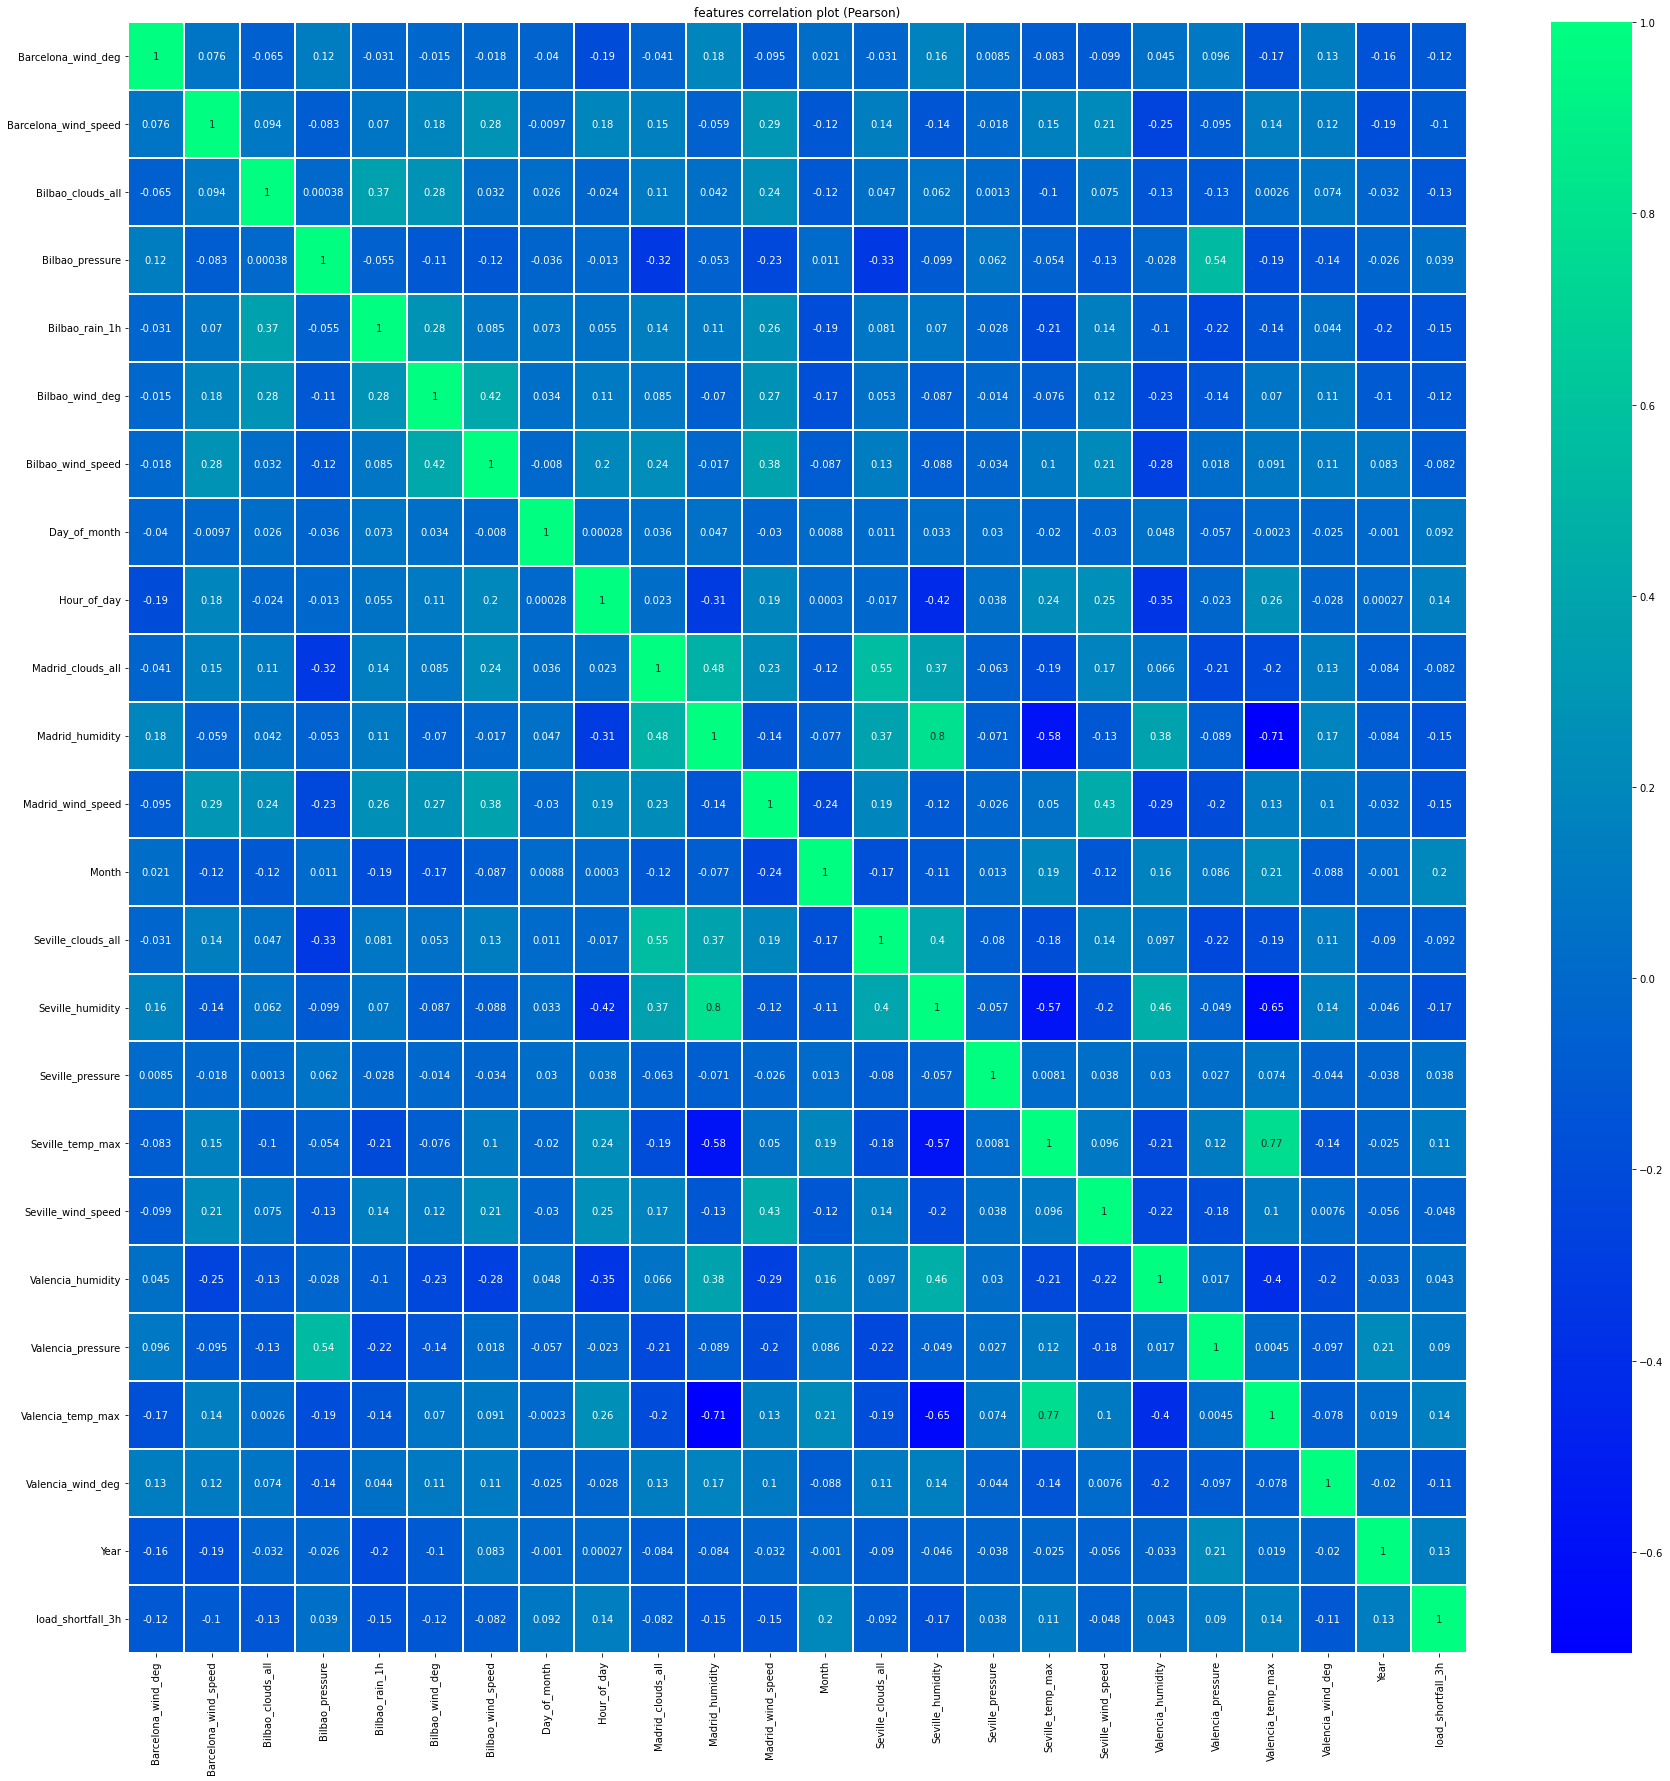

In [ ]:
# evaluate correlation
plt.figure(figsize = (30,30))
plt.title('features correlation plot (Pearson)')
corr = train_data2.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot = True,linewidths=.1,cmap="winter")
plt.show()

In [ ]:
# Reorder columns so that our response variable is the last column of the dataframe
column_titles = [col for col in train_data2.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
train_data2 = train_data2.reindex(columns=column_titles)
#drop the time variable
train_data2=train_data2.drop(['time'],axis=1)

Removed the multicollinearity columns

## Feature Scaling

Normalise the dataset so that they are in a standard scale that a model can read and provide accurate results. The model is able to adjust the numbers it can take when using algorithms. It can also assist in speeding the calculations

In [ ]:
X = train_data2
y = train_data2[:len(train_data2)][['load_shortfall_3h']]

In [ ]:
# create scaler object
scaler = StandardScaler()

# create scaled version of the predictors (there is no need to scale the response)
scaled_train = scaler.fit_transform(X)

# convert the scaled predictor values into a dataframe
scaled_train = pd.DataFrame(scaled_train,columns=X.columns)
scaled_train.head()

Barcelona_wind_deg  Barcelona_wind_speed  Bilbao_clouds_all  \
0           -1.660205              1.932284          -1.335491   
1           -0.578686              0.630270          -1.335491   
2            1.520733             -0.485743          -1.335491   
3            0.925711             -0.299741          -1.335491   
4            0.779762              0.816272          -1.274045   

   Bilbao_pressure  Bilbao_rain_1h  Bilbao_wind_deg  Bilbao_wind_speed  \
0         1.718219       -0.362123         0.630823          -0.501451   
1         1.784583       -0.362123         0.607959          -0.501451   
2         1.817765       -0.362123         0.542632          -0.501451   
3         1.817765       -0.362123         0.398912          -0.501451   
4         1.751401       -0.362123         0.255192          -0.894581   

   Day_of_month  Hour_of_day  Madrid_clouds_all  Madrid_humidity  \
0     -1.675368    -1.090901          -0.694188         0.270621   
1     -1.675368    -0.654451          -0.694188         0.298017   
2     -1.675368    -0.218001          -0.694188         0.284319   
3     -1.675368     0.218449          -0.694188        -0.044439   
4     -1.675368     0.654899          -0.694188        -0.017043   

   Madrid_wind_speed     Month  Seville_clouds_all  Seville_humidity  \
0          -0.950708 -1.602429           -0.565065          0.516117   
1          -1.130863 -1.602429           -0.565065          0.692953   
2          -0.770554 -1.602429           -0.565065          0.383491   
3          -0.770554 -1.602429           -0.565065          0.118238   
4          -0.770554 -1.602429           -0.565065         -0.161751   

   Seville_pressure  Seville_temp_max  Seville_wind_speed  Valencia_humidity  \
0          0.735519         -2.616796            0.542975           0.540928   
1          0.735519         -2.539014            0.542975           0.298645   
2          0.735519         -2.105564            0.144442           0.021750   
3          0.735519         -1.361703            0.941509          -0.583957   
4          0.735519         -1.348214            0.343708          -0.358980   

   Valencia_pressure  Valencia_temp_max  Valencia_wind_deg      Year  \
0          -1.242351          -2.835227           0.248717 -1.226179   
1          -1.050427          -2.591966          -1.157189 -1.226179   
2          -0.935272          -1.761812           1.654623 -1.226179   
3          -0.513039          -0.850953           1.303146 -1.226179   
4           0.523351          -1.100044           0.951670 -1.226179   

   load_shortfall_3h  
0          -0.758601  
1          -1.246168  
2          -1.226428  
3          -1.072913  
4          -0.776808

In [ ]:
time_df = test_data['time'].copy()
test_data = test_data.drop('time', 1)

## Scaled train = Scaled data and removed correlated features has 37 rows

## standardizing the data has caused it to be centered around zero

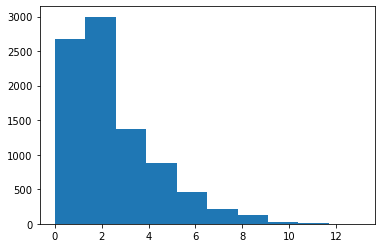

In [ ]:
plt.hist(train_data2['Madrid_wind_speed'])
plt.show()

## Validation 

In [18]:
scaled_train.describe().loc['std'].head()

NameError: name 'scaled_train' is not defined

## 5. Model Building

## Linear Regression

## Splitting data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_train, y,
                                                    test_size=0.2, 
                                                    random_state=42)

In [ ]:
X_train

Barcelona_wind_deg  Barcelona_wind_speed  Bilbao_clouds_all  \
5967           -0.417768             -1.415753           0.968714   
8270           -1.794927              0.258265           0.047032   
100             0.888288              0.444267           0.753655   
3410           -0.006117              2.304288           1.019919   
1790            0.143574              0.816272          -0.311399   
...                  ...                   ...                ...   
5734            0.742339             -0.857747           1.122328   
5191           -1.297204              0.630270           0.753655   
5390            0.892030             -0.299741           0.968714   
860             0.495349             -0.113739           0.128960   
7270            0.405534              0.444267          -0.721036   

      Bilbao_pressure  Bilbao_rain_1h  Bilbao_wind_deg  Bilbao_wind_speed  \
5967         0.988210        0.438134         1.610731           2.250461   
8270         0.623206       -0.362123        -0.773710          -0.304886   
100          0.324567        0.171382         1.039118          -0.501451   
3410         0.523660        1.238392         1.558469           2.840156   
1790        -0.239530       -0.362123         0.715749           0.874505   
...               ...             ...              ...                ...   
5734         1.585490       -0.362123        -0.806374          -0.304886   
5191        -3.259109       -0.362123        -0.871701          -0.501451   
5390        -0.903174        2.038649        -0.479738          -0.304886   
860         -0.239530       -0.362123         1.097912          -0.501451   
7270        -1.367725       -0.362123         0.108206           0.677940   

      Day_of_month  Hour_of_day  Madrid_clouds_all  Madrid_humidity  \
5967      0.029534     0.218449           0.494079        -0.030741   
8270      1.734435    -0.218001           1.979413         0.133638   
100      -0.311447     1.527799           0.589141         0.887042   
3410     -1.561708     1.527799          -0.694188        -0.140327   
1790     -0.311447    -0.218001          -0.694188        -0.660860   
...            ...          ...                ...              ...   
5734      0.256854    -0.218001          -0.694188         0.722663   
5191     -0.538767     0.218449          -0.694188        -0.551274   
5390     -1.220727    -0.218001           1.979413         1.297989   
860       0.370514    -1.090901          -0.266412         0.914438   
7270      1.393455    -0.218001           0.256426        -0.030741   

      Madrid_wind_speed     Month  Seville_clouds_all  Seville_humidity  \
5967           0.310372 -1.602429           -0.565065         -0.589102   
8270          -0.950708  1.007947           -0.565065          0.471909   
100           -0.230091 -1.602429           -0.565065          0.987678   
3410           1.571453 -1.022345           -0.565065          0.958205   
1790           1.571453  0.427864           -0.565065         -0.368059   
...                 ...       ...                 ...               ...   
5734           0.490526  1.588031           -0.565065          0.442436   
5191           0.310372  1.007947           -0.565065         -0.294377   
5390           0.670681  1.297989            1.563667          1.193985   
860           -0.590400 -0.732303            0.506168          0.221392   
7270           1.391298 -0.152220           -0.015715          0.000348   

      Seville_pressure  Seville_temp_max  Seville_wind_speed  \
5967          0.302616         -0.149801           -0.054825   
8270         -1.140396         -1.126293           -1.250426   
100           0.735519         -1.982639           -0.851892   
3410         -0.274589         -0.816257           -0.254092   
1790         -0.563191          1.990971           -0.254092   
...                ...               ...                 ...   
5734         -0.418890          0.037986          

## Checking for the shapes

In [ ]:
#checking the shape of the training and testing data

print('Training predictor:', X_train.shape)
print('Training target:', y_train.shape)
print('Testing predictor:', X_test.shape)
print('Testing target:', y_test.shape)

Training predictor: (7010, 24)
Training target: (7010, 1)
Testing predictor: (1753, 24)
Testing target: (1753, 1)


In [ ]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Extract the intercept, or y-cut, of our linear model
a = float(lin_reg.intercept_)
print(a)

10673.857611548556


In [ ]:
# Extract the coefficient, or gradient, of our linear model
b = lin_reg.coef_
print(b)

[[ 1.29230626e-12 -5.22959454e-12 -4.06430445e-12  9.09494702e-13
  -2.16715534e-12 -2.81019652e-12 -3.22586402e-12  9.52127266e-13
  -1.25055521e-12 -1.96109795e-12  6.82121026e-13 -1.42108547e-12
   3.29691829e-12 -2.07478479e-12 -2.27373675e-12 -1.21502808e-12
   6.25277607e-13 -5.68434189e-14  1.12265752e-12  1.53477231e-12
  -3.58113539e-12 -2.38742359e-12  2.10320650e-12  5.21774866e+03]]


In [ ]:
# Predict variables on unseen data
predict = lin_reg.predict(X_test) # 20 %

In [ ]:
# Predicting values on the training dataset
lin_train_pred = lin_reg.predict(X_train)# Predict variables on the training set

In [ ]:
# Generate the values that fall along our regression line
gen_y = lin_reg.predict(X_train)

x1 = np.append(X_train, y_train)
x2 = np.append(X_train, gen_y)

fig, ax = plt.subplots()
ax.scatter(x1,x2, color='green')
ax.plot(x1,x2, color='red')
plt.show()

NameError: name 'lin_reg' is not defined

In [ ]:
print("Training Results for Linear Model:")
# Calculate the mean-squared-error
print('MSE:', metrics.mean_squared_error(y_test,predict))
#Calculate the root mean squared-error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predict)))
# Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y_test,predict))

Training Results for Linear Model:
MSE: 2.6550744488801293e-22
RMSE: 1.6294399187696764e-11
R_squared: 1.0


## Checks the accuracy of the model

In [ ]:
#lin_reg.score(X_test, y_test)

## Lasso

The lasso regression allows you to shrink or regularize these coefficients to avoid overfitting and make them work better on different datasets. This type of regression is used when the dataset shows high multicollinearity or when you want to automate variable elimination and feature selection.

In [ ]:
# Import LASSO module
from sklearn.linear_model import Lasso

In [ ]:
# Least absolute shrinkage solution operator
lasso = Lasso(alpha=0.01)
# Train the LASSO model
lasso.fit(X_train, y_train)
# Get predictions
lasso_prediction = lasso.predict(X_test)

In [ ]:
# Extract intercept from model
intercept = float(lasso.intercept_)

In [ ]:
# Extract intercept
print("Intercept:", float(intercept))

Intercept: 10673.85472346382


In [ ]:
print("Training Results for lasso :")
# Calculate the mean-squared-error
print('MSE:', metrics.mean_squared_error(y_test,lasso_prediction))
#Calculate the root mean squared-error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,lasso_prediction)))
# Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y_test,lasso_prediction))

Training Results for lasso :
MSE: 0.489971920874121
RMSE: 0.6999799431941753
R_squared: 0.9999999826022125


 ## Ridge

In [ ]:
# Creating Ridge model
Ridge = Ridge()

In [ ]:
# Train the model
Ridge.fit(X_train, y_train)

Ridge()

In [ ]:
# Get predictions
Ridge_prediction = Ridge.predict(X_test)

In [ ]:
b0 = float(Ridge_prediction.intercept_)

AttributeError: 'numpy.ndarray' object has no attribute 'intercept_'

## Desicion Tree

In [ ]:
# Instantiate regression tree model
Reg_tree = DecisionTreeRegressor(random_state=42)

In [ ]:
# Fitting the model
Reg_tree.fit(X_train,y_train)
Tree_pred = Reg_tree.predict(X_test)

In [ ]:
# assigning a random variable name to the plot for suppressing text output
#plt.figure(figsize=(9,9))
#_ = plot_tree(Reg_tree, feature_names=['LotArea'],  filled=True)

In [ ]:
print("Training Results for Desicion Tree:")
# Calculate the mean-squared-error
print('MSE:', metrics.mean_squared_error(y_test,Tree_pred))
#Calculate the root mean squared-error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,Tree_pred)))
# Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y_test,Tree_pred))


Training Results for Desicion Tree:
MSE: 2172.7010283958407
RMSE: 46.61224118615024
R_squared: 0.9999228523322655


## Random Forest

In [ ]:
# Random Forest 
Random_forest = RandomForestRegressor(n_estimators=500, random_state=42)
Random_forest.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [ ]:
# Predicting
Random_forest_pred = Random_forest.predict(X_test)

In [ ]:
print("Training Results for Random Forest:")
# Calculate the mean-squared-error
print('MSE:', metrics.mean_squared_error(y_test,Random_forest_pred))
#Calculate the root mean squared-error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,Random_forest_pred)))
# Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y_test,Random_forest_pred))


Training Results for Random Forest:
MSE: 900.5218974548881
RMSE: 30.008697030275876
R_squared: 0.9999680245173062


## XG Boost 

Is an implementation of gradient boosted decision trees designed for speed and performance.

In [ ]:
Boost_data = X.copy(deep = False)

In [ ]:
X = Boost_data
y = Boost_data.loc[:, 'load_shortfall_3h']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3332, 
                                                    random_state=42)

In [ ]:
# Creating a model
xgb.XGBClassifier().get_params()

In [ ]:
model_xgboost = xgb.XGBClassifier(learning_rate = 0.1,
                                     max_depth = 5,
                                     n_estimators = 5000,
                                     subsample = 0.5,
                                     colsample_bytree = 0.5,
                                     eval_metric = 'auc',
                                     verbosity = 1, 
                                     use_label_encoder = False)
eval_set = [(X_train, y_train)]
model_xgboost.fit(X_test, y_test,early_stopping_rounds = 10, eval_set= eval_set, verbose = True)

## Evaluate Model Performance

In [ ]:
#pip install xgboost==0.90

In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [30, 25]
plt.show()

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [12, 14]
plt.show()

Improve the models iilustrated above by aggregating

In [ ]:
from pprint import pprint

rand_forest = RandomForestRegressor(random_state = 42)
pprint(Random_forest.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth.append(None)
# Minimum number of samples required to split a node

min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree

bootstrap = [True, False]

## Hyperparameter Tuning 

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [ ]:
# Instantiate the grid search model
grid_searchcv = GridSearchCV(estimator = Random_forest, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
grid_searchcv.fit(X_train, y_train)
grid_searchcv.best_params_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

In [ ]:
#print('Model Accuracy', evaluate(Random_forest, X_test, y_test))

## ARIMA 

## Checking For Stationarity

If p< 0.05 ; Data is stationary

if p>0.05; Data is not stationary

In [ ]:
a = pd.Series(train_data['time'])
b = pd.Series(train_data['load_shortfall_3h'])
dataset = pd.merge(a, b, right_index = True,
               left_index = True)
dataset

In [ ]:
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(dataset['load_shortfall_3h'])

In [ ]:
pip install pmdarima

In [ ]:

# This function is used to pick the best model from ARIMA
stepwise_fit = auto_arima(dataset['load_shortfall_3h'], trace=True,
suppress_warnings=True)

In [ ]:
X  = dataset['time']
y = dataset

In [ ]:
X= pd.to_datetime(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=42)

In [ ]:

model=ARIMA(y_train['load_shortfall_3h'],order=(5,1,5))
model=model.fit()
model.summary()

## Evaluate Model

In [ ]:
predictions

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [ ]:
start = len(y_test)
end = len(y_train) - len(y_test)
result = model
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = False)
y_test['load_shortfall_3h'].plot(legend = False)

## 6. Model Performance 

In [ ]:
Why we chooose Random....

In [ ]:
Lin_RMSE = np.round(np.sqrt(metrics.mean_squared_error(y_test,predict)), 1)
Decision_RMSE = np.round(np.sqrt(metrics.mean_squared_error(y_test,Tree_pred)), 1)
Random_RMSE = np.round(np.sqrt(metrics.mean_squared_error(y_test,Random_forest_pred)),1)

Lin_R = metrics.r2_score(y_test, predict)
Decision_R =metrics.r2_score(y_test,Tree_pred)
Random_RMSE = metrics.r2_score(y_test,Random_forest_pred)

In [ ]:
data = {'Models' : ['Linear Regression', 'Decision Tree', 'Random Forest'],'RMSE' :[Lin_RMSE, Decision_RMSE, Random_RMSE]}
df_performance = pd.DataFrame(data)
df_performance

Models  RMSE
0  Linear Regression   0.0
1      Decision Tree  46.6
2      Random Forest  30.0

In [ ]:
import plotly.graph_objects as go
x = df_performance['Models']
y = df_performance['RMSE']
#y1 = df_performance['R_Squared']

fig = go.Figure()
fig.add_trace(go.Histogram( y=y, x=x, name="RMSE", histfunc ='avg'))
fig.add_trace(go.Histogram( y=y, x=x, name="R_Squared", histfunc = 'avg'))

fig.show()

## Model Pickling

In [ ]:
#Loading the pickle library
import pickle
import csv

model_save_path = "ARIMA.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(ARIMA,file)

## Submission

In [ ]:
#Make submission
X_train = removed_correlated[:len(train_data)].drop('load_shortfall_3h',axis=1)
X_test = removed_correlated[len(test_data):]

In [ ]:
time = pd.DataFrame({'time': test_data[len(test_data):].time})
time = pd.DataFrame({'time': test_data['time']})

In [ ]:
#Random_forest.fit(X_test, y)
#test_prediction = Random.predict(X_test)

In [ ]:
predictions.to_frame('load_shortfall_3h')

In [ ]:
output = pd.DataFrame(predictions.to_frame('load_shortfall_3h'))
#output = output.drop(range(2920, 3505
output.drop(output.index[range(2920, 3505)], axis=0, inplace=True)
output

In [ ]:
data = pd.concat([output, time.reindex(output.index)], axis=1)

In [ ]:
data.rename(columns={"time": "timex"} , inplace=True)
data.insert(0, 'time', copy_test.time.values)
data.drop(['timex'],axis=1, inplace=True)

In [ ]:
data

In [ ]:
data.to_csv('ARIMA.csv' , index=False)